In [1]:
import os
import pandas as pd
import numpy as np
import numpy
import datetime
import warnings
from scipy.spatial.distance import  cdist
from sklearn import linear_model
import tqdm as tqdm
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
import fillinggapsts as fillinggapsts

#### First you import the needed datasets:

In [3]:
# Read the xlsx data with the coordinates (x,y) of your points
pathcoords =r'C:\Users\User\OneDrive\Projects\Y2022\Fillgaps\filling-series-lr\raing_gauges_unfilled_coords_example.xlsx'
coords=pd.read_excel(pathcoords)
coords.rename(columns={"CÓDIGO": "Code"}, inplace=True)
coords.set_index('Code', inplace=True)
coords.head()

,Lon,Lat
Code,,
26J/04UG,215040.6150,98919.8390
24J/02F,219249.0000,146172.0000
26I/02F,204698.0000,106919.0000
23I/01C,198404.2900,158137.5540
28H/01G,189316.7726,71143.1852


In [4]:
# Read the xlsx file with your nonfilled data
pathnonfilleddata =r'C:\Users\User\OneDrive\Projects\Y2022\Fillgaps\filling-series-lr\raing_gauges_unfilled_example.xlsx'
nonfilleddata=pd.read_excel(pathnonfilleddata)
nonfilleddata.set_index('dates', inplace=True)
nonfilleddata.head()

,26J/04UG,24J/02F,26I/02F,23I/01C,28H/01G,26M/02G,27K/01UG,26I/03UG,28I/01UG,24J/02UG,...,26L/01UG,25N/01UG,23K/01UG,27J/01UG,24H/01UG,26J/01UG,27J/03C,27L/02G,24I/01C,24K/02UG
dates,,,,,,,,,,,,,,,,,,,,,
1969-10-01,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,...,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0
1969-10-02,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,2.8,...,0.0,NaN,2.1,NaN,NaN,0.0,NaN,NaN,1.3,0.0
1969-10-03,NaN,NaN,NaN,NaN,14.6,NaN,NaN,10.0,46.5,6.5,...,2.0,NaN,1.2,NaN,NaN,11.3,NaN,NaN,1.4,0.9
1969-10-04,NaN,NaN,NaN,4.0,9.8,NaN,NaN,21.3,12.5,6.0,...,25.7,NaN,9.6,NaN,NaN,17.3,NaN,NaN,6.7,12.4
1969-10-05,NaN,NaN,NaN,0.0,7.7,NaN,NaN,2.0,8.7,1.4,...,0.6,NaN,8.0,NaN,NaN,0.8,NaN,NaN,2.0,0.8


In [5]:
pathfilter =r'C:\Users\User\OneDrive\Projects\Y2022\Fillgaps\filling-series-lr\filter_example.xlsx'
filtaux=pd.read_excel(pathfilter)
filtaux

,CÓDIGO,NOME
0,23I/01C,ALCÁÇOVAS


#### (a) Using and ploting the fillinggapsts.fillgapslr function:

In [6]:
filleddata, r2listdf  = fillinggapsts.fillgapslr(nonfilleddata, coords, filtaux, work_w_filter = True, Use_t = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 24.59it/s]


As we have two outputs, i.e., a dataframe with the filled gaps, and another with the R² list, we set two variables as outputs.

1. Firstly we check the filleddata:

In [7]:
filleddata.head()

,23I/01C
dates,
1969-10-01,0.000000
1969-10-02,1.977921
1969-10-03,0.000000
1969-10-04,4.000000
1969-10-05,0.000000


2. Secondly we check the r2listdf:

In [8]:
r2listdf

,Mean,Min,Max
23I/01C,0.797799,0.797799,0.797799


#### (b) Using and ploting the fillinggapsts.summarygaps function:

In [9]:
summarygaps = fillinggapsts.summarygaps(nonfilleddata, coords)
summarygaps.head()

,CoordX,CoordY,NumGaps,PercentageGaps
Code,,,,
26J/04UG,215040.6150,98919.8390,730.0,100.000000
24J/02F,219249.0000,146172.0000,730.0,100.000000
26I/02F,204698.0000,106919.0000,730.0,100.000000
23I/01C,198404.2900,158137.5540,33.0,4.520548
28H/01G,189316.7726,71143.1852,0.0,0.000000


#### (c) Using and ploting the fillinggapsts.plotgaps function:

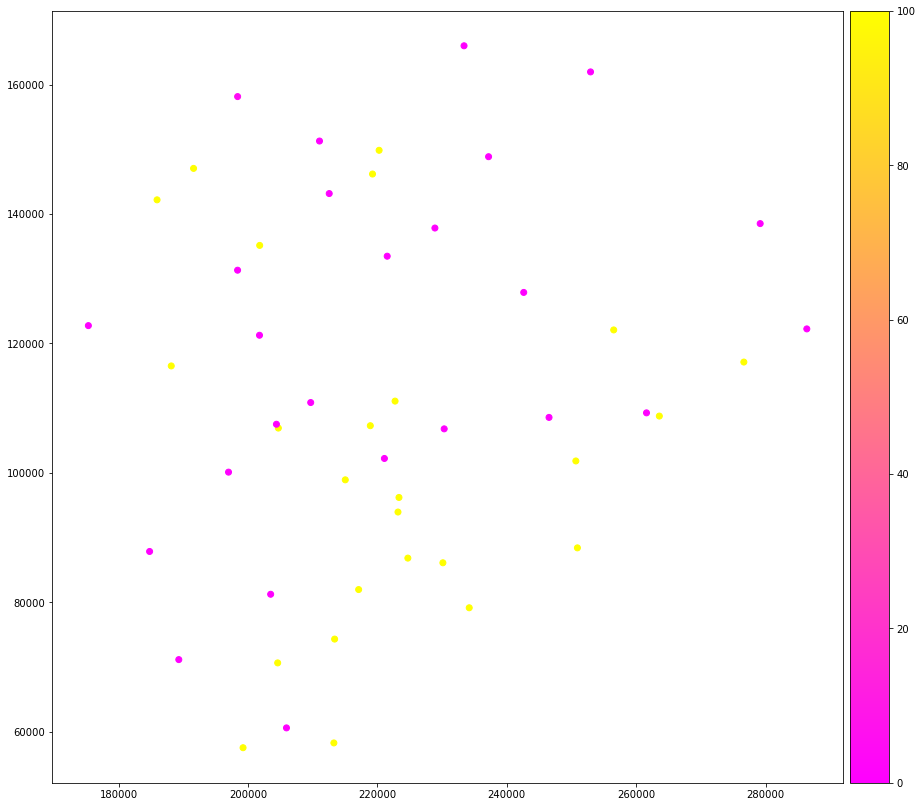

In [11]:
fillinggapsts.plotgaps(summarygaps,  crsproj = 'epsg:2963', cmapproj = "spring", backmapproj = False)